# *Importing Libraries*

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('C:/Users/athar/Documents/BrainTumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/athar/Documents/BrainTumor\BrainTumorClassification.ipynb
C:/Users/athar/Documents/BrainTumor\.git\COMMIT_EDITMSG
C:/Users/athar/Documents/BrainTumor\.git\config
C:/Users/athar/Documents/BrainTumor\.git\description
C:/Users/athar/Documents/BrainTumor\.git\HEAD
C:/Users/athar/Documents/BrainTumor\.git\index
C:/Users/athar/Documents/BrainTumor\.git\hooks\applypatch-msg.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\commit-msg.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\fsmonitor-watchman.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\post-update.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\pre-applypatch.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\pre-commit.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\pre-merge-commit.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\pre-push.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\pre-rebase.sample
C:/Users/athar/Documents/BrainTumor\.git\hooks\pre-receive.sample
C:/Users/at

## *Color*

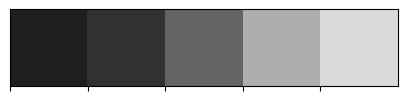

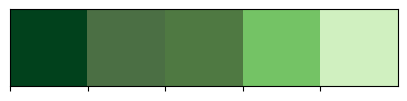

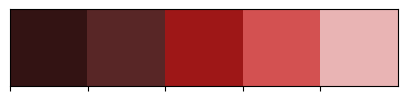

In [7]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

# *Data Preperation*

In [8]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

##### ***Appending all the images from the directory into Python list and then converting it into a numpy array after resizing it***

In [10]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('C:/Users/athar/Documents/BrainTumor','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:/Users/athar/Documents/BrainTumor','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:01<00:00, 58.25it/s]


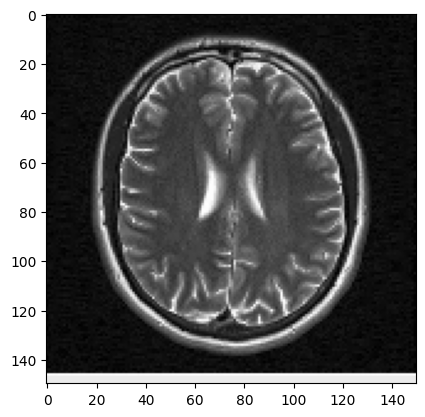

In [31]:
plt.imshow(X_train[33])
plt.show()

In [11]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [12]:
X_train.shape

(3264, 150, 150, 3)

# **Dividing the dataset into Training and Testing sets.**

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.3,random_state=101)

#### Performing One Hot Encoding on the labels after converting it into numerical values:

In [14]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)